

#Library

kumpulan library yang digunakan dalam membuat akurasi untuk data peminjaman





In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import euclidean_distances
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics

#Data

mengambil dan menampilkan data

In [57]:
dataku = pd.read_csv("/content/loan_data_2007_2014.csv")

dataku.head()

<ipython-input-57-e2fa02d30d03>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dataku = pd.read_csv("/content/loan_data_2007_2014.csv")


Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

kumpulan data berisikan berbagai tipe,disini akan ditampilkan tipe data apa saja yang ada di dalam data

In [58]:
#deskripsi data(jenis tipe data )
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

tipe data jenis object atau lain nya,selain numerik. akan diubah menjadi numerik,bisa int atau float.Dan juga akan ditampilkan sample data yang ada dalam data.

dalam code ini, data yang bernilai 0 akan diubah menjadi Nan

In [59]:
# Mengganti nilai nol dengan NaN
dataku.replace(0, np.nan, inplace=True)

di kode ini,data yang bernilai Nan akan diganti dengan mean atau nilai rata -rata

In [60]:
#replace Nan with mean atau mengganti nan dengan rata"
median = dataku.median()
dataku.fillna(median, inplace=True)
print(dataku)



<ipython-input-60-05f5a4eeb36c>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = dataku.median()


        Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0         233142.5  1077501    1296599       5000         5000   
1              1.0  1077430    1314167       2500         2500   
2              2.0  1077175    1313524       2400         2400   
3              3.0  1076863    1277178      10000        10000   
4              4.0  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280    466280.0  8598660    1440975      18400        18400   
466281    466281.0  9684700   11536848      22000        22000   
466282    466282.0  9584776   11436914      20700        20700   
466283    466283.0  9604874   11457002       2000         2000   
466284    466284.0  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
0                4975.0   36 months     10.65       162.87     B  ...   
1                2500.0   60 months     15.27        59.83   

mencari data kosong dan diganti dengan nilai median

In [61]:
# handling missing value dengan nilai median
median_values = dataku.median()
dataku.fillna(median_values, inplace=True)

<ipython-input-61-7ff6558afd29>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = dataku.median()


In [62]:
#mengubah data ke numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in dataku.columns.values:
  #encoding pada variabel kategori
  if dataku[col].dtypes=='object' or dataku[col].dtype=='bool':
    data = dataku[col].append(dataku[col])
    le.fit(data.values)
    dataku[col] = le.transform(dataku[col])
dataku.head(12)



<ipython-input-62-a7052516e7ae>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataku[col].append(dataku[col])
<ipython-input-62-a7052516e7ae>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataku[col].append(dataku[col])
<ipython-input-62-a7052516e7ae>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataku[col].append(dataku[col])
<ipython-input-62-a7052516e7ae>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataku[col].append(dataku[col])
<ipython-input-62-a7052516e7ae>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0     233142.5  1077501    1296599       5000         5000           4975.0   
1          1.0  1077430    1314167       2500         2500           2500.0   
2          2.0  1077175    1313524       2400         2400           2400.0   
3          3.0  1076863    1277178      10000        10000          10000.0   
4          4.0  1075358    1311748       3000         3000           3000.0   
5          5.0  1075269    1311441       5000         5000           5000.0   
6          6.0  1069639    1304742       7000         7000           7000.0   
7          7.0  1072053    1288686       3000         3000           3000.0   
8          8.0  1071795    1306957       5600         5600           5600.0   
9          9.0  1071570    1306721       5375         5375           5350.0   
10        10.0  1070078    1305201       6500         6500           6500.0   
11        11.0  1069908    1305008      12000        12000          12000.0   

    term  int_rate  installment  grade  ...  total_bal_il  il_util  \
0      0     10.65       162.87      1  ...           NaN      NaN   
1      1     15.27        59.83      2  ...           NaN      NaN   
2      0     15.96        84.33      2  ...           NaN      NaN   
3      0     13.49       339.31      2  ...           NaN      NaN   
4      1     12.69        67.79      1  ...           NaN      NaN   
5      0      7.90       156.46      0  ...           NaN      NaN   
6      1     15.96       170.08      2  ...           NaN      NaN   
7      0     18.64       109.43      4  ...           NaN      NaN   
8      1     21.28       152.39      5  ...           NaN      NaN   
9      1     12.69       121.45      1  ...           NaN      NaN   
10     1     14.65       153.45      2  ...           NaN      NaN   
11     0     12.69       402.54      1  ...           NaN      NaN   

    open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0           NaN          NaN         NaN       NaN           22900.0     NaN   
1           NaN          NaN         NaN       NaN           22900.0     NaN   
2           NaN          NaN         NaN       NaN           22900.0     NaN   
3           NaN          NaN         NaN       NaN           22900.0     NaN   
4           NaN          NaN         NaN       NaN           22900.0     NaN   
5           NaN          NaN         NaN       NaN           22900.0     NaN   
6           NaN          NaN         NaN       NaN           22900.0     NaN   
7           NaN          NaN         NaN       NaN           22900.0     NaN   
8           NaN          NaN         NaN       NaN           22900.0     NaN   
9           NaN          NaN         NaN       NaN           22900.0     NaN   
10          NaN          NaN         NaN       NaN           22900.0     NaN   
11          NaN          NaN         NaN       NaN           22900.0     NaN   

    total_cu_tl  inq_last_12m  
0           NaN           NaN  
1           NaN           NaN  
2           NaN           NaN  
3           NaN           NaN  
4           NaN           NaN  
5           NaN           NaN  
6           NaN           NaN  
7           NaN           NaN  
8           NaN           NaN  
9           NaN           NaN  
10          NaN           NaN  
11          NaN           NaN  

[12 rows x 75 columns]

In [63]:
#feature scalling  untuk menyamakan rentang agar setiap fitur berkontribusi sebanding dalam perhitungan
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataku)
# scaled_data1 = pd.DataFrame(scaled_data, columns=data.columns)
print(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


[[ 0.         -1.10175872 -1.13855997 ...         nan         nan
          nan]
 [-1.73204895 -1.10176524 -1.13705616 ...         nan         nan
          nan]
 [-1.73204152 -1.10178865 -1.1371112  ...         nan         nan
          nan]
 ...
 [ 1.73203409 -0.3208234  -0.27055732 ...         nan         nan
          nan]
 [ 1.73204152 -0.31897849 -0.2688378  ...         nan         nan
          nan]
 [ 1.73204895 -0.35617512 -0.30268594 ...         nan         nan
          nan]]


akan menampilkan kolom apa saja yang ada dalam data loan

In [64]:
#kolom yang ada dalam data
print(dataku.columns.values)

['Unnamed: 0' 'id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv'
 'term' 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title'
 'emp_length' 'home_ownership' 'annual_inc' 'verification_status'
 'issue_d' 'loan_status' 'pymnt_plan' 'url' 'desc' 'purpose' 'title'
 'zip_code' 'addr_state' 'dti' 'delinq_2yrs' 'earliest_cr_line'
 'inq_last_6mths' 'mths_since_last_delinq' 'mths_since_last_record'
 'open_acc' 'pub_rec' 'revol_bal' 'revol_util' 'total_acc'
 'initial_list_status' 'out_prncp' 'out_prncp_inv' 'total_pymnt'
 'total_pymnt_inv' 'total_rec_prncp' 'total_rec_int' 'total_rec_late_fee'
 'recoveries' 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt'
 'next_pymnt_d' 'last_credit_pull_d' 'collections_12_mths_ex_med'
 'mths_since_last_major_derog' 'policy_code' 'application_type'
 'annual_inc_joint' 'dti_joint' 'verification_status_joint'
 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal' 'open_acc_6m' 'open_il_6m'
 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il' 'total_b

data akan dipisahkan,diambil data yang paling penting dalam proses mencari akurasi untuk resiko peminjam.

In [65]:
#memisahkan kolom penting
x = dataku[['loan_amnt', 'int_rate', 'annual_inc', 'dti']]
y = dataku['loan_status']

data yang sudah dipisahkan akan di bagi menjadi data latih dan data uji

In [66]:
#membagi data latih dan data uji
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

melakukan perhitungan dengan algoritma knn dengan menghitung jarak euclidean

In [67]:

#euclidean distances
knn = KNeighborsClassifier(n_neighbors=5)

#data latih
knn.fit(x_train,y_train)

KNeighborsClassifier()

menampilkan hasil prediksi yang sudah dihitung dengan algoritma knn

In [68]:
#hasil akurasi
y_pred = knn.predict(x_test)
# print("Akurasi model KNN:",metrics.accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1480 10138     0     1     3  5526     3     4     6]
 [ 4964 56323     1     2     6 28138    14     0    31]
 [   17   218     0     0     0    82     0     0     0]
 [   19   150     0     1     0   137     0     0     0]
 [   40   381     0     0     0   369     0     0     0]
 [ 4337 42084     1     4    13 27486     9     0    19]
 [   98   830     0     0     0   351     1     0     1]
 [   38   319     0     0     0   147     0     0     0]
 [  196  1736     0     0     0   790     0     0     0]]
              precision    recall  f1-score   support

           0       0.13      0.09      0.10     17161
           1       0.50      0.63      0.56     89479
           2       0.00      0.00      0.00       317
           3       0.12      0.00      0.01       307
           4       0.00      0.00      0.00       790
           5       0.44      0.37      0.40     73953
           6       0.04      0.00      0.00      1281
           7       0.00      0.00      0.00       504

akurasi sudah didapatkan, data akurasi akan di visualisasi kan dengan confusion matrix

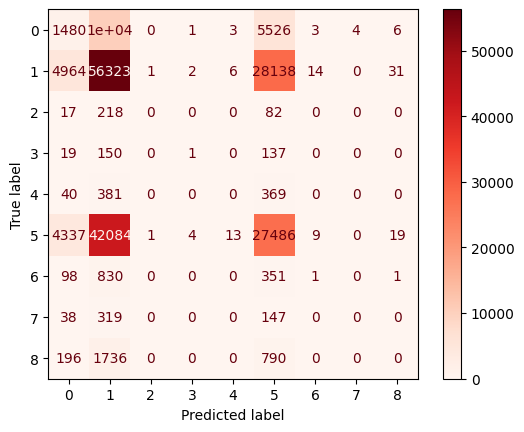

In [69]:
#visualisasi data hasil akurasi

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
label_class = np.unique(y) # label kelas unik
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = label_class)

cm_display.plot(cmap=plt.cm.Reds)
plt.show()